<a href="https://colab.research.google.com/github/macscheffer/DS-Unit-2-Sprint-4-Model-Validation/blob/master/DS_Unit_2_Sprint_Challenge_4_Model_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Data Science Unit 2 Sprint Challenge 4 — Model Validation

Follow the instructions for each numbered part to earn a score of 2. See the bottom of the notebook for a list of ways you can earn a score of 3.

## Predicting Blood Donations

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive.

The goal is to predict the last column, whether the donor made a donation in March 2007, using information about each donor's history. We'll measure success using recall score as the model evaluation metric.

Good data-driven systems for tracking and predicting donations and supply needs can improve the entire supply chain, making sure that more patients get the blood transfusions they need.

#### Run this cell to load the data:

In [0]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')

df = df.rename(columns={
    'Recency (months)': 'months_since_last_donation', 
    'Frequency (times)': 'number_of_donations', 
    'Monetary (c.c. blood)': 'total_volume_donated', 
    'Time (months)': 'months_since_first_donation', 
    'whether he/she donated blood in March 2007': 'made_donation_in_march_2007'
})

## Part 1.1 — Begin with baselines

What **accuracy score** would you get here with a **"majority class baseline"?** 
 
(You don't need to split the data into train and test sets yet. You can answer this question either with a scikit-learn function or with a pandas function.)

In [2]:
df.head()

,months_since_last_donation,number_of_donations,total_volume_donated,months_since_first_donation,made_donation_in_march_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [15]:
df.made_donation_in_march_2007.mean()

0.23796791443850268

In [3]:
import matplotlib.pyplot as plt

df.corr()

,months_since_last_donation,number_of_donations,total_volume_donated,months_since_first_donation,made_donation_in_march_2007
months_since_last_donation,1.000000,-0.182745,-0.182745,0.160618,-0.279869
number_of_donations,-0.182745,1.000000,1.000000,0.634940,0.218633
total_volume_donated,-0.182745,1.000000,1.000000,0.634940,0.218633
months_since_first_donation,0.160618,0.634940,0.634940,1.000000,-0.035854
made_donation_in_march_2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
X = df.drop(columns='made_donation_in_march_2007')
y = df.made_donation_in_march_2007

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X, y)

predictions = model.predict(X)

accuracy_score(y, predictions)

0.7713903743315508

In [23]:
# accuracy_score with just majority class baseline
majority_class = [0] * len(y)
accuracy_score(y, majority_class)

0.7620320855614974

What **recall score** would you get here with a **majority class baseline?**

(You can answer this question either with a scikit-learn function or with no code, just your understanding of recall.)

In [24]:
# with majority class recall our recall score would be 0. Because we would predict 0 every time and thus never get any true positives.

# recall score is calculated as true positives / (true_positives + false negatives)

# to confirm

recall_score(y, majority_class)

0.0

## Part 1.2 — Split data

In this Sprint Challenge, you will use "Cross-Validation with Independent Test Set" for your model evaluation protocol.

First, **split the data into `X_train, X_test, y_train, y_test`**, with random shuffle. (You can include 75% of the data in the train set, and hold out 25% for the test set.)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, shuffle=True, random_state=42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((561, 4), (187, 4), (561,), (187,))

## Part 2.1 — Make a pipeline

Make a **pipeline** which includes:
- Preprocessing with any scikit-learn [**Scaler**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
- Feature selection with **[`SelectKBest`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)([`f_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html))**
- Classification with [**`LogisticRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [51]:
# baseline with train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, shuffle=True, random_state=42)
accuracy_score(y_test, LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train).predict(X_test))

0.7540106951871658

In [69]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import warnings

warnings.filterwarnings(action='ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, shuffle=True, random_state=42)

# making sure its working

pipe_all = make_pipeline(RobustScaler(), SelectKBest(f_classif, k=3), LogisticRegression(solver='lbfgs', max_iter=1000))

accuracy_score(y_test, pipe_all.fit(X_train, y_train).predict(X_test))

0.7486631016042781

In [0]:

pipe = make_pipeline(
    RobustScaler(),
    SelectKBest(f_classif),
    LogisticRegression(solver='lbfgs', max_iter=1000))

## Part 2.2 — Do Grid Search Cross-Validation

Do [**GridSearchCV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) with your pipeline. Use **5 folds** and **recall score**.

Include these **parameters for your grid:**

#### `SelectKBest`
- `k : 1, 2, 3, 4`

#### `LogisticRegression`
- `class_weight : None, 'balanced'`
- `C : .0001, .001, .01, .1, 1.0, 10.0, 100.00, 1000.0, 10000.0`


**Fit** on the appropriate data.

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'selectkbest__k': [1, 2, 3, 4],
    'logisticregression__class_weight': [None, 'balanced'],
    'logisticregression__C': [.0001, .001, .01, .1, 1.0, 10.0, 100.00, 1000.0, 10000.0]
}

grid_search_acc = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5, verbose=5, return_train_score=True)
grid_search_acc.fit(X_train, y_train)


In [107]:
grid_search_acc.best_params_

{'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'selectkbest__k': 4}

In [102]:
grid_search_acc.cv_results_['mean_test_score']

array([0.76827094, 0.76827094, 0.76827094, 0.76827094, 0.62923351,
       0.70053476, 0.69340463, 0.6969697 , 0.76827094, 0.76827094,
       0.76827094, 0.76827094, 0.62923351, 0.6916221 , 0.69340463,
       0.69875223, 0.76827094, 0.77183601, 0.77183601, 0.77183601,
       0.62923351, 0.67201426, 0.68092692, 0.68092692, 0.76827094,
       0.77361854, 0.77540107, 0.77540107, 0.63101604, 0.61675579,
       0.61497326, 0.65240642, 0.76827094, 0.7771836 , 0.7771836 ,
       0.78074866, 0.63458111, 0.61853832, 0.61853832, 0.65775401,
       0.76827094, 0.7771836 , 0.7771836 , 0.77896613, 0.63458111,
       0.62032086, 0.62032086, 0.65597148, 0.76827094, 0.7771836 ,
       0.7771836 , 0.77896613, 0.63458111, 0.62032086, 0.62032086,
       0.65597148, 0.76827094, 0.7771836 , 0.7771836 , 0.77896613,
       0.63458111, 0.62032086, 0.62032086, 0.65597148, 0.76827094,
       0.7771836 , 0.7771836 , 0.77896613, 0.63458111, 0.62032086,
       0.62032086, 0.65597148])

In [95]:
max(grid_search_acc.cv_results_['mean_test_score'])

0.7807486631016043

In [0]:
grid_search_recall = GridSearchCV(pipe, param_grid, scoring='recall', cv=5, verbose=5, return_train_score=True)
grid_search_recall.fit(X_train, y_train)

## Part 3 — Show best score and parameters

Display your **best cross-validation score**, and the **best parameters** (the values of `k, class_weight, C`) from the grid search.

(You're not evaluated here on how good your score is, or which parameters you find. You're only evaluated on being able to display the information. There are several ways you can get the information, and any way is acceptable.)

In [101]:
grid_search_recall.cv_results_['mean_test_score']

array([0.        , 0.        , 0.        , 0.        , 0.7845194 ,
       0.57678596, 0.51522007, 0.50754148, 0.        , 0.        ,
       0.        , 0.        , 0.7845194 , 0.60002742, 0.51522007,
       0.53839298, 0.        , 0.03078294, 0.03846154, 0.03846154,
       0.7845194 , 0.67681338, 0.66145619, 0.646099  , 0.        ,
       0.06156589, 0.06924448, 0.07692308, 0.7845194 , 0.76916221,
       0.76916221, 0.76916221, 0.        , 0.07692308, 0.07692308,
       0.10763746, 0.7845194 , 0.7845194 , 0.7845194 , 0.76148361,
       0.        , 0.07692308, 0.07692308, 0.10763746, 0.7845194 ,
       0.7845194 , 0.7845194 , 0.75380502, 0.        , 0.07692308,
       0.07692308, 0.10763746, 0.7845194 , 0.7845194 , 0.7845194 ,
       0.75380502, 0.        , 0.07692308, 0.07692308, 0.10763746,
       0.7845194 , 0.7845194 , 0.7845194 , 0.75380502, 0.        ,
       0.07692308, 0.07692308, 0.10763746, 0.7845194 , 0.7845194 ,
       0.7845194 , 0.75380502])

In [111]:
max(grid_search_recall.cv_results_['mean_test_score'])

0.784519402166461

In [112]:
grid_search_recall.best_params_

{'logisticregression__C': 0.0001,
 'logisticregression__class_weight': 'balanced',
 'selectkbest__k': 1}

## Part 4 — Calculate classification metrics from a confusion matrix

Suppose this is the confusion matrix for your binary classification model:

<table>
  <tr>
    <th colspan="2" rowspan="2"></th>
    <th colspan="2">Predicted</th>
  </tr>
  <tr>
    <th>Negative</th>
    <th>Positive</th>
  </tr>
  <tr>
    <th rowspan="2">Actual</th>
    <th>Negative</th>
    <td>85</td>
    <td>58</td>
  </tr>
  <tr>
    <th>Positive</th>
    <td>8</td>
    <td>36</td>
  </tr>
</table>

Calculate accuracy

In [110]:
tn, fp, fn, tp = (85, 58, 8, 36)

accuracy = (tn + tp) / (tn + fp + fn + tp)

accuracy

0.6470588235294118

Calculate precision

In [117]:
precision = tp / (tp + fp)

precision

0.3829787234042553

Calculate recall

In [120]:
recall = tp / (tp + fn)
recall

0.8181818181818182

In [123]:
f1_score = 2 * precision * recall / (precision + recall)
f1_score

0.5217391304347826

In [124]:
# fp = false positive

fp_rate = fp / (fp + tn)

fp_rate

0.40559440559440557

## BONUS — How you can earn a score of 3

### Part 1
Do feature engineering, to try improving your cross-validation score.

### Part 2
Add transformations in your pipeline and parameters in your grid, to try improving your cross-validation score.

### Part 3
Show names of selected features. Then do a final evaluation on the test set — what is the test score?

### Part 4
Calculate F1 score and False Positive Rate. 

In [125]:
df.head()

,months_since_last_donation,number_of_donations,total_volume_donated,months_since_first_donation,made_donation_in_march_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


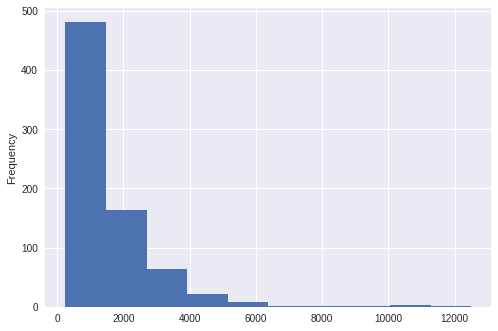

In [128]:
df.total_volume_donated.plot.hist()

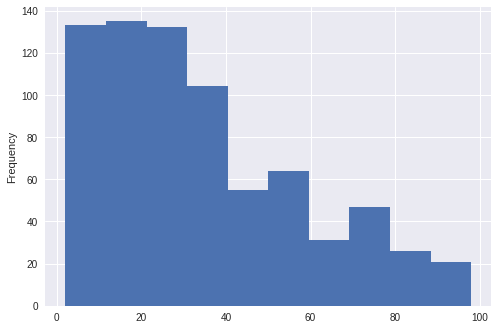

In [131]:
df.months_since_first_donation.plot.hist()

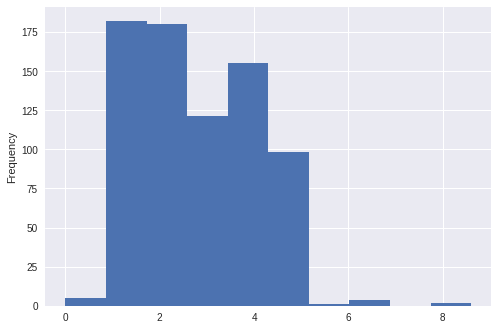

In [133]:
(df.months_since_last_donation**.5).plot.hist()

In [0]:
df['number_of_donations_over9'] = (df.number_of_donations > 9)
df['volume_per_donation'] = df.total_volume_donated / df.number_of_donations
df['total_volume_donated_squared'] = df.total_volume_donated ** 2
df['months_since_first_donation_sqrt'] = df.months_since_first_donation ** .5
df['months_since_last_donation_sqrt'] = df.months_since_last_donation ** .5

In [0]:
X = df.drop(columns='made_donation_in_march_2007')
y = df.made_donation_in_march_2007

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, shuffle=True, random_state=42)

In [141]:
# without any pipeline it gets worse from 0.7540106951871658
accuracy_score(y_test, LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train).predict(X_test))

0.7433155080213903

In [0]:
pipe = make_pipeline(
    RobustScaler(),
    SelectKBest(f_classif),
    LogisticRegression(solver='lbfgs', max_iter=1000))

In [143]:
param_grid = {
    'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'logisticregression__class_weight': [None, 'balanced'],
    'logisticregression__C': [.0001, .001, .01, .1, 1.0, 10.0, 100.00, 1000.0, 10000.0]
}

grid_search_acc = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5, verbose=5, return_train_score=True)
grid_search_acc.fit(X_train, y_train)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1, score=0.7699115044247787, total=   0.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1, score=0.7678571428571429, total=   0.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1, score=0.7678571428571429, total=   0.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=1, score=0.7678571428571429, total=   0.0s
[CV] logisticregression__C=0.0001, lo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV]  logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=3, score=0.7678571428571429, total=   0.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=3 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=3, score=0.7678571428571429, total=   0.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=3 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=3, score=0.7678571428571429, total=   0.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=4 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=4, score=0.7699115044247787, total=   0.0s
[CV] logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=4 
[CV]  logisticregression__C=0.0001, logisticregression__class_weight=None, selectkbest__k=4, score=0

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:   15.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('selectkbest', SelectKBest(k=10, score_func=<function f_classif at 0x7fce034f4268>)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_int...enalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'logisticregression__class_weight': [None, 'balanced'], 'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=5)

In [144]:
grid_search_acc.best_params_

{'logisticregression__C': 100.0,
 'logisticregression__class_weight': None,
 'selectkbest__k': 8}

In [147]:
grid_search_acc.cv_results_['mean_test_score']

array([0.76827094, 0.76827094, 0.76827094, 0.76827094, 0.76827094,
       0.76827094, 0.76827094, 0.76827094, 0.76827094, 0.64171123,
       0.63279857, 0.68092692, 0.69875223, 0.70944742, 0.70944742,
       0.70944742, 0.71122995, 0.71122995, 0.76827094, 0.76827094,
       0.76827094, 0.76827094, 0.77183601, 0.77183601, 0.77183601,
       0.77183601, 0.77183601, 0.64171123, 0.63279857, 0.67557932,
       0.68805704, 0.71122995, 0.70944742, 0.71836007, 0.7254902 ,
       0.7254902 , 0.76827094, 0.76827094, 0.77361854, 0.77361854,
       0.77361854, 0.77361854, 0.77361854, 0.77361854, 0.77361854,
       0.64171123, 0.63279857, 0.63814617, 0.64884135, 0.64171123,
       0.64171123, 0.63636364, 0.64171123, 0.64171123, 0.76648841,
       0.76827094, 0.7771836 , 0.7771836 , 0.7771836 , 0.7771836 ,
       0.78253119, 0.78253119, 0.78253119, 0.64171123, 0.63636364,
       0.62745098, 0.62566845, 0.62388592, 0.62923351, 0.64171123,
       0.64705882, 0.64705882, 0.76648841, 0.76648841, 0.77361

In [148]:
# this is better than 78.07 we got before feature engineering
max(grid_search_acc.cv_results_['mean_test_score'])

0.7950089126559715

In [0]:
best_acc_estimator = grid_search_acc.best_estimator_

In [166]:
best_acc_estimator

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('selectkbest', SelectKBest(k=8, score_func=<function f_classif at 0x7fce034f4268>)), ('logisticregression', LogisticRegression(C=100.0, class_weight=None, dual=False, fit_in...enalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [167]:
df.head()

,months_since_last_donation,number_of_donations,total_volume_donated,months_since_first_donation,made_donation_in_march_2007,number_of_donations_over9,volume_per_donation,total_volume_donated_squared,months_since_first_donation_sqrt,months_since_last_donation_sqrt
0,2,50,12500,98,1,True,250.0,156250000,9.899495,1.414214
1,0,13,3250,28,1,True,250.0,10562500,5.291503,0.000000
2,1,16,4000,35,1,True,250.0,16000000,5.916080,1.000000
3,2,20,5000,45,1,True,250.0,25000000,6.708204,1.414214
4,1,24,6000,77,0,True,250.0,36000000,8.774964,1.000000


In [0]:
df['months_since_first_minus_months_since_last'] = df.months_since_first_donation - df.months_since_last_donation
df['months_between_donations'] = df.number_of_donations / df.months_since_first_donation


In [0]:
df['expected_months_till_donation'] = df.months_since_last_donation - df.months_between_donations


In [0]:
df['expected_donation_next_month'] = (df.expected_months_till_donation < 1)

In [174]:
df.pivot_table(index='expected_donation_next_month', values='made_donation_in_march_2007')

,made_donation_in_march_2007
expected_donation_next_month,
False,0.237057
True,0.285714


In [0]:
X = df.drop(columns='made_donation_in_march_2007')
y = df.made_donation_in_march_2007

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, shuffle=True, random_state=42)

In [177]:
# without any pipeline it gets worse from 0.754, then stays at about .7433
accuracy_score(y_test, LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train).predict(X_test))

0.7433155080213903

In [0]:
param_grid = {
    'selectkbest__k': [4, 5, 6, 7, 8, 9, 10, 11, 12],
    'logisticregression__class_weight': [None, 'balanced'],
    'logisticregression__C': [.0001, .001, .01, .1, 1.0, 10.0, 100.00, 1000.0, 10000.0]
}

grid_search_acc = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5, verbose=5, return_train_score=True)
grid_search_acc.fit(X_train, y_train)


In [180]:
max(grid_search_acc.cv_results_['mean_test_score']) #improved from .795

0.8003565062388592

In [181]:
grid_search_acc.best_params_

{'logisticregression__C': 10.0,
 'logisticregression__class_weight': None,
 'selectkbest__k': 12}

In [182]:
final_best_estimator = grid_search_acc.best_estimator_
accuracy_score(y_test, final_best_estimator.predict(X_test))

0.7807486631016043

In [0]:
# from our baseline of .7504 which we could most likely improve with some more feature engineering.